# Лабораторная работа №4. Основы нейронных сетей
## Общее задание

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.
2. Произвести масштабирование признаков (scaling).
3. С использованием библиотеки [scikit-learn](http://scikit-learn.org/stable/) обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков. 
[Пример MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
Пример и описание [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. Проверить точность модели по тестовой выборке.
5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации.
Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

## Варианты
Массивы данных берутся из [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php)

Вариант определяется набором данных, который можно загрузить по ссылке выше:
1. Abalone
2. Adult
3. Artificial Characters
4. ser Knowledge Modeling Data (Students' Knowledge Levels on DC Electrical Machines)
5. EEG Eye State
6. seismic-bumps
7. banknote authentication
8. Weight Lifting Exercises monitored with Inertial Measurement Units
9. REALDISP Activity Recognition Dataset
10. mage Segmentation
11. ISOLET
12. sEMG for Basic Hand movements
13. Letter Recognition
14. Dataset for Sensorless Drive Diagnosis
15. Phishing Websites
16. Multiple Features
17. Diabetic Retinopathy Debrecen Data Set
18. Page Blocks Classification
19. Optical Recognition of Handwritten Digits
20. Pen-Based Recognition of Handwritten Digits
21. Smartphone-Based Recognition of Human Activities and Postural Transitions
22. Indoor User Movement Prediction from RSS data
23. Spambase

## Вариант 2



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import time
from mpl_toolkits.mplot3d import Axes3D

Загрузка данных

In [2]:
df = pd.read_csv('dataset.csv') #чтение файла
df.head(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


2. Произвести масштабирование признаков (scaling).

In [3]:
def get_encoded_data(data):
    vars_to_dummy = np.array(data.select_dtypes(include=['object', 'bool']).columns) #Определяет переменные (столбцы) vars_to_dummy для преобразования категориальных и булевых переменных в one-hot представление.
    new_data = pd.get_dummies(data, columns=vars_to_dummy, dummy_na=True) #Создает новый DataFrame new_data, в котором категориальные и булевые переменные преобразуются в dummy переменные (one-hot encoding), и с отдельными столбцами для пропущенных (NaN) значений 
    new_data = new_data.fillna(0) #Заполняет пропущенные значения нулями
    return new_data

x_data = df[df.columns.drop('class')] #выделяется набор данных для обучения X исключая столбец class
y_data = pd.DataFrame(df['class']) #DataFrame содерж тольк столбец класс 

X_raw_encoded = get_encoded_data(x_data) # преобразует категориальные и булевые переменные в dummy переменные и заполняет пропущенные значения.

scaler_x = preprocessing.StandardScaler() #стандартизация признаков
x_data = pd.DataFrame(scaler_x.fit_transform(X_raw_encoded), columns=X_raw_encoded.columns) #записываем результат стандартизации



Масштабирование производится с помощью стандартизации - математическое ожидание каждой колонки становится равным 0, а его стандратное отклонение становится равным 1. Проверим результат стандартизации:

In [4]:
print('\nМатематическое ожидание для каждой из колонок x_data:')
print(x_data.mean())

print('\nСтандартное отклонение для каждой из колонок x_data:')
print(x_data.std())


Математическое ожидание для каждой из колонок x_data:
genergy              -2.199823e-17
gpuls                 6.599468e-17
gdenergy             -2.199823e-17
gdpuls                0.000000e+00
nbumps                0.000000e+00
nbumps2               4.399645e-17
nbumps3               4.399645e-17
nbumps4              -3.299734e-17
nbumps5               6.874446e-19
nbumps6               0.000000e+00
nbumps7               0.000000e+00
nbumps89              0.000000e+00
energy                2.199823e-17
maxenergy            -1.099911e-17
seismic_a             6.599468e-17
seismic_b             6.599468e-17
seismic_nan           0.000000e+00
seismoacoustic_a      2.199823e-17
seismoacoustic_b     -2.199823e-17
seismoacoustic_c     -3.849690e-17
seismoacoustic_nan    0.000000e+00
shift_N               3.299734e-17
shift_W              -3.299734e-17
shift_nan             0.000000e+00
hazard_a             -2.199823e-17
hazard_b             -5.499557e-17
hazard_c             -4.399645e-17


1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)


val_size = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=val_size) # Данные автоматически перемешаются по выборкам


3. С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.

## Perceptron

In [6]:
perceptron = Perceptron(tol=1e-3, random_state=0, verbose=True)  # Создание объекта Perceptron с указанными параметрами: 
                                                                 # tol - порог остановки обучения
                                                                 # random_state - начальное состояние генератора случайных чисел
                                                                 # verbose - вывод информации во время обучения (True для вывода, False для отключения)

perceptron.fit(x_train, y_train.ravel())  # Обучение модели перцептрона на обучающих данных x_train с соответствующими метками y_train
                                          # ravel() используется для преобразования y_train в одномерный массив, если он не является таковым

perceptron_y_predict = perceptron.predict(x_val)  # Предсказание меток классов для валидационных данных x_val с помощью обученной модели перцептрона
                                                    # Norm  "размер" вектора весов модели. NNZs Количество ненулевых элементов. Bias константа, которая добавляется к взвешенной сумме входов нейронов перед применением активационной функции.
                                                    # T: Общее количество обучающих примеров, использованных до этой эпохи. 
                                                    # Avg. loss: Среднее значение функции потерь (ошибки) на обучающих примерах на данной эпохе. 
                                                    # Функция потерь - это мера различия между фактическими и предсказанными значениями целевой переменной.

-- Epoch 1
Norm: 18.34, NNZs: 21, Bias: -21.000000, T: 2067, Avg. loss: 1.707091
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.16, NNZs: 21, Bias: -17.000000, T: 4134, Avg. loss: 1.655230
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 21.67, NNZs: 21, Bias: -17.000000, T: 6201, Avg. loss: 1.783915
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 19.64, NNZs: 21, Bias: -16.000000, T: 8268, Avg. loss: 1.734012
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 21.09, NNZs: 21, Bias: -13.000000, T: 10335, Avg. loss: 1.834364
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 14.12, NNZs: 21, Bias: -19.000000, T: 12402, Avg. loss: 1.698057
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 20.79, NNZs: 21, Bias: -16.000000, T: 14469, Avg. loss: 1.591685
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 22.36, NNZs: 21, Bias: -20.000000, T: 16536, Avg. loss: 1.656824
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 23.01, NNZs: 21, Bias: -20.000000, T: 18603, Avg. l

## MLPClassifier

In [7]:
mlp = MLPClassifier(random_state=1, verbose=True)  # Создание объекта MLPClassifier с указанными параметрами:
                                                    # random_state - начальное состояние генератора случайных чисел
                                                    # verbose - вывод информации во время обучения (True для вывода, False для отключения)

mlp.fit(x_train, y_train.ravel())  # Обучение модели многослойного перцептрона на обучающих данных x_train с соответствующими метками y_train,
                                   # ravel() используется для преобразования y_train в одномерный массив, если он не является таковым

mlp_y_predict = mlp.predict(x_val)  # Предсказание меток классов для валидационных данных x_val с помощью обученной модели многослойного перцептрона  loss функция потерь, ее минимизация растет с увеличением числа итераций 


Iteration 1, loss = 0.62307387
Iteration 2, loss = 0.46229085
Iteration 3, loss = 0.36111872
Iteration 4, loss = 0.30010431
Iteration 5, loss = 0.26343399
Iteration 6, loss = 0.24214008
Iteration 7, loss = 0.22932413


Iteration 8, loss = 0.22090247
Iteration 9, loss = 0.21581357
Iteration 10, loss = 0.21224968
Iteration 11, loss = 0.20999206
Iteration 12, loss = 0.20790499
Iteration 13, loss = 0.20676199
Iteration 14, loss = 0.20563992
Iteration 15, loss = 0.20450440
Iteration 16, loss = 0.20416337
Iteration 17, loss = 0.20332556
Iteration 18, loss = 0.20282994
Iteration 19, loss = 0.20185905
Iteration 20, loss = 0.20135332
Iteration 21, loss = 0.20097004
Iteration 22, loss = 0.20050939
Iteration 23, loss = 0.20030131
Iteration 24, loss = 0.19985283
Iteration 25, loss = 0.19939269
Iteration 26, loss = 0.19879183
Iteration 27, loss = 0.19841810
Iteration 28, loss = 0.19800392
Iteration 29, loss = 0.19787126
Iteration 30, loss = 0.19732575
Iteration 31, loss = 0.19706398
Iteration 32, loss = 0.19684847
Iteration 33, loss = 0.19652218
Iteration 34, loss = 0.19617248
Iteration 35, loss = 0.19585748
Iteration 36, loss = 0.19566354
Iteration 37, loss = 0.19531208
Iteration 38, loss = 0.19503941
Iteration 

c:\AI\myvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4. Проверить точность модели по тестовой выборке.

In [8]:
print(f'Точность перцептрона: {accuracy_score(y_val, perceptron_y_predict)}')  # коэффициента детерминации показывает, насколько хорошо зависимая переменная предсказывается моделью относительно среднего значения зависимой переменной.
print(f'Точность многослойного перцептрона: {accuracy_score(y_val, mlp_y_predict)}') # точность измеряет долю правильно классифицированных наблюдений относительно общего числа наблюдений

Точность перцептрона: 0.9342359767891683
Точность многослойного перцептрона: 0.9284332688588007


5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [9]:
# Эффективность работы перцептрона
def get_p_score(learning_rate, alpha):
    start_time = time.time()  # Засекаем время начала выполнения функции
    perceptron = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=learning_rate, alpha=alpha, max_iter=1000, tol=1e-3)
    perceptron.fit(x_train, y_train.ravel())  # Обучаем модель на обучающих данных
    end_time = time.time()  # Засекаем время окончания выполнения обучения модели
    predict = perceptron.predict(x_val)  # Предсказываем метки классов для валидационных данных
    elapsed_time = end_time - start_time  # Вычисляем затраченное время на обучение модели
    return accuracy_score(y_val, predict) / elapsed_time  # Возвращаем оценку производительности модели: точность деленную на время обучения

# Эффектиность работы многослойного перцептрона
def get_mlp_score(learning_rate, alpha, optimizer):
    start_time = time.time()  # Засекаем время начала выполнения функции
    mlp = MLPClassifier(learning_rate='constant', learning_rate_init=learning_rate, alpha=alpha, solver=optimizer, max_iter=1000, tol=1e-3)
    mlp.fit(x_train, y_train.ravel())  # Обучаем модель на обучающих данных
    end_time = time.time()  # Засекаем время окончания выполнения обучения модели
    predict = mlp.predict(x_val)  # Предсказываем метки классов для валидационных данных
    elapsed_time = end_time - start_time  # Вычисляем затраченное время на обучение модели
    return accuracy_score(y_val, predict) / elapsed_time  # Возвращаем оценку производительности модели: точность деленную на время обучения


def to_test(learning_rate_list, alpha_list, optimizer):
    perceptron_score = []  # Создаем список для хранения оценок производительности перцептрона
    mlp_score = []         # Создаем список для хранения оценок производительности многослойного перцептрона
    for id in range(len(learning_rate_list)):  # Перебираем индексы значений параметров
        # Вызываем функцию get_p_score для оценки производительности перцептрона с текущими значениями параметров
        perceptron_score.append(get_p_score(learning_rate_list[id], alpha_list[id]))
        # Вызываем функцию get_mlp_score для оценки производительности многослойного перцептрона с текущими значениями параметров
        mlp_score.append(get_mlp_score(learning_rate_list[id], alpha_list[id], optimizer[id]))
    
    perceptron_score = np.array(perceptron_score)  # Преобразуем список оценок перцептрона в массив numpy
    mlp_score = np.array(mlp_score)                # Преобразуем список оценок многослойного перцептрона в массив numpy
    
    return perceptron_score, mlp_score  # Возвращаем два массива оценок производительности для перцептрона и многослойного перцептрона


def draw_test(x, perceptron_score, mlp_score, x_label):
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(x, perceptron_score)
    axs[0].set_title('perceptron')
    axs[0].set(xlabel=x_label, ylabel='score')

    axs[1].plot(x, mlp_score)
    axs[1].set_title('mlp')
    axs[1].set(xlabel=x_label, ylabel='score')

    fig.tight_layout()
    plt.show()

Коэффициент обучения (learning rate).

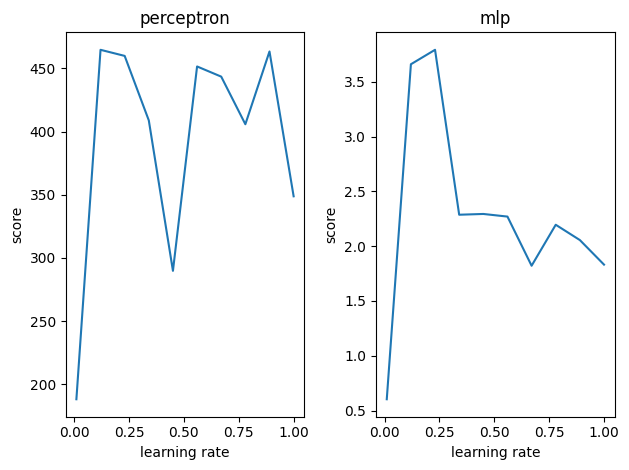

Лучшее значение learning_rate для перцептрона: 0.12
Лучшее значение learning_rate для многослойного перцептрона: 0.23


In [10]:
count_tests = 10  # Количество тестов

learning_rate_list = np.linspace(0.01, 1, count_tests)  # Генерация массива значений скорости обучения от 0.01 до 1
perceptron_score, mlp_score = to_test(learning_rate_list, np.full(count_tests, 0.0001), np.full(count_tests, 'adam'))  # Выполнение тестов для перцептрона и многослойного перцептрона
draw_test(learning_rate_list, perceptron_score, mlp_score, 'learning rate') 

print(f'Лучшее значение learning_rate для перцептрона: {learning_rate_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение learning_rate для многослойного перцептрона: {learning_rate_list[np.argmax(mlp_score)]}')

Параметр регуляризации (alpha).

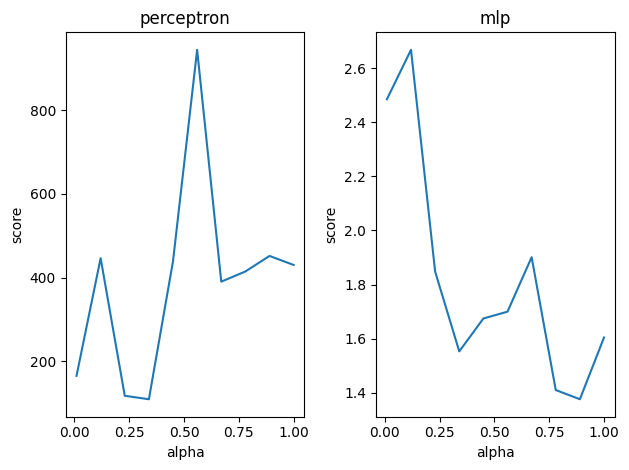

Лучшее значение alpha для перцептрона: 0.5556
Лучшее значение alpha для многослойного перцептрона: 0.11120000000000001


In [11]:
alpha_list = np.linspace(0.0001, 1, count_tests)  # Генерация массива значений параметра alpha от 0.0001 до 1
perceptron_score, mlp_score = to_test(np.full(count_tests, 0.001), alpha_list, np.full(count_tests, 'adam'))  # Выполнение тестов для перцептрона и многослойного перцептрона
draw_test(learning_rate_list, perceptron_score, mlp_score, 'alpha')

print(f'Лучшее значение alpha для перцептрона: {alpha_list[np.argmax(perceptron_score)]}')
print(f'Лучшее значение alpha для многослойного перцептрона: {alpha_list[np.argmax(mlp_score)]}')

Оптимизатор (solver, только для mlp).

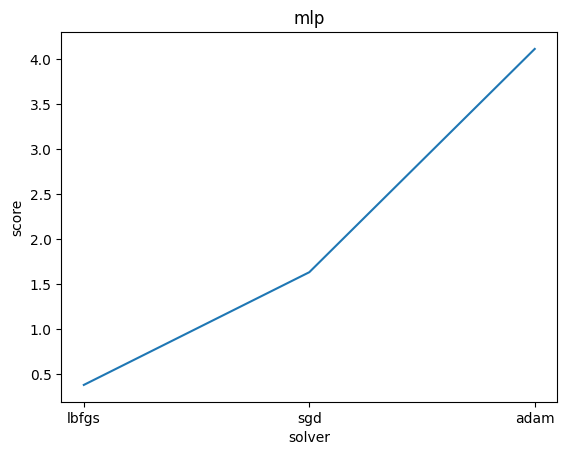

Лучший оптимизатор для многослойного перцептрона: adam


In [12]:
optimizers_list = np.array(['lbfgs', 'sgd', 'adam'])  # Массив оптимизаторов

# Выполнение тестов для перцептрона и многослойного перцептрона с использованием заданных оптимизаторов
perceptron_score, mlp_score = to_test(np.full(len(optimizers_list), 0.001), np.full(len(optimizers_list), 0.0001), optimizers_list)

plt.plot(optimizers_list, mlp_score)
plt.title('mlp')
plt.xlabel('solver')
plt.ylabel('score')
plt.show()

print(f'Лучший оптимизатор для многослойного перцептрона: {optimizers_list[np.argmax(mlp_score)]}')